<img src="../logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 6
#### Lugano Damian

-------------------------

### Punto 1

Para el siguiente cuadripolo se pide calcular los parámetros Z, teniendo en cuenta que el transformador es ideal:

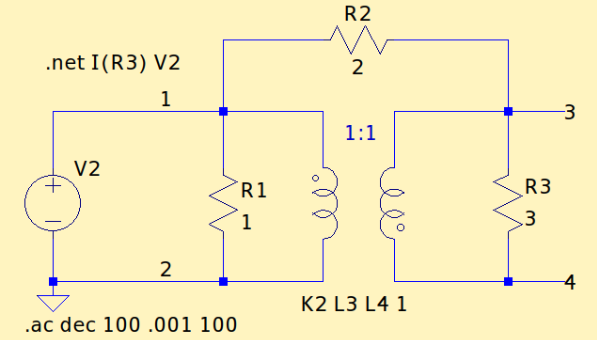

Bonus:

+1 💎 Simular en SPICE los parámetros de cuadripolo con la directiva .net

+1 🎓 Verifique mediante el módulo de simulación simbólica SymPy la impedancia de entrada 

+1 🤯 Presentación en jupyter notebook

#### Desarrollo

En primer lugar se intentaron obtener los parámetros Z mediante la interconexión de cuadripolos. Sin embargo, esto no fue posible ya que el transformador ideal no tiene definidos sus parámetros Y o Z. Solo tiene definidos sus parámetros T. Por lo tanto, unicamente se pueden asociar los componentes R1, el transformador y R3 con parámetros T sin poder asociarlos con R2, que al ser una resistencia en paralelo, solo tiene parámetros Y.

En consecuencia se optó por obtener los parámetros Z del circuito completo, utilizando el teorema de nodos:

In [19]:
from IPython.display import IFrame
IFrame("./docs/TS6_Punto1.pdf", width=950, height=1000)

#### Simulación simbólica

In [20]:
# ---------- Imports -----------
import sympy as sp
from pytc2.cuadripolos import Z2Tabcd_s, Y2Tabcd_s, Tabcd2Z_s, Tabcd2Y_s
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from pytc2.cuadripolos import calc_MAI_impedance_ij, calc_MAI_vtransf_ij_mn, calc_MAI_ztransf_ij_mn

In [21]:
#------------Variables----------------

#Resistencias

R1=1
R2=2
R3=3

#Trafo

N1=1
N2=1
a=N1/N2

In [22]:
#----------- Matrices -----------------

TR1= sp.Matrix  ([ 
                    [1, 0],
                    [1/R1, 1]
                ])

TR3= sp.Matrix  ([ 
                    [1, 0],
                    [1/R3, 1]
                ])

Ttr= sp.Matrix  ([ 
                    [-a, 0],
                    [0, -1/a]
                ])

T1= TR1*Ttr*TR3

print_latex(a_equal_b_latex_s('T_1', T1))

<IPython.core.display.Math object>

Como se puede observar del resultado de T1, B=0, esto quiere decir que el conjunto de la asociación de cuadripolos T de R1, Trafo y R2 no tienen parámetros Y definidos.
Sin embargo, si tienen parámetros Z.

Por otro lado, la matriz  de parámetros Y de la resistencia en paralelo es la siguiente:

In [23]:
Y_R2= sp.Matrix  ([ 
                    [ 1/R2, -1/R2],
                    [-1/R2,  1/R2]
                ])

print_latex(a_equal_b_latex_s('Y_{R2}', Y_R2))

<IPython.core.display.Math object>

Del resultado, se puede observar que el cuadripolo de Y de R2, al tener un determinante nulo, no tiene parámetros Z definidos.

#### Simulación en LTspice

<figure>
<center>
<img src=./pics/Circuito1.png width = "1000">
<figcaption> Figura 1. Circuito a simular </figcaption>
</figure>

<figure>
<center>
<img src=./pics/ParametrosZ.png width = "1000">
<figcaption> Figura 2. Parametros Z en el espectro </figcaption>
</figure>

#### Conclusión

Se puede observar que en este circuito particular la forma más simple de resolverlo no es mediante la interconexión de cuadripolos. Esto se debe a la limitación que presenta la simplificación del transformador como ideal, el cual no tiene definidos los  parámetros Z e Y. En su lugar, la resolución es mas directa utilizando el método de nodos y la definición de parámetros Z.

A partir de la simulación circuital (Figura 2) se observa que los resultados se parecen a los obtenidos mediante el método de nodos. Sin embargo, es importante destacar que numéricamente los valores no coinciden exactamente. A medida que la simulación progresa, los valores convergen hacia un módulo de 1/3, mientras que el método analítico produce un valor con un módulo de 3/10. Esta diferencia puede atribuirse a la simulación de un transfomador perfecto en lugar de uno ideal. En el caso de los perfectos se debe tener en cuenta las impedancias de los bobinados que conforman al transformador.

Teniendo en cuenta lo descripto anteriormente, se concluye que los parámetros Z del circuito son:

In [24]:
Z= sp.Matrix  ([ 
                    [3/10, -3/10],
                    [-3/10, 3/10]
                ])

print_latex(a_equal_b_latex_s('Z', Z))

<IPython.core.display.Math object>

Por otro lado, no se pudo llegar a una conclusión con el desarrollo analítico del circuito. Queda pendiente para la próxima entrega

### Ejercicio 2

Dado el siguiente circuito:

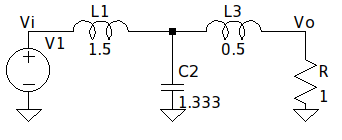

👉 Obtener la transferencia de tensión fracción V subíndice o entre V subíndice i por método de cuadripolos (se sugiere referirse a alguno de los métodos de interconexión ya vistos). Ayuda: si C subíndice 2 igual fracción 4 entre 3 (se utilizó 1.333 para la simulación), los polos de la transferencia están ubicados sobre una circunferencia de radio unitario

👉 Construya la matriz de admitancia indefinida (MAI) del circuito.

👉 Compute la transferencia de tensión con la MAI.

Bonus:

+1 💎 Simular en SPICE  para verificar la transferencia.

+1 🤯 Compute la impedancia de entrada con la MAI.

+1 🤯 Presentación en jupyter notebook

### Desarrollo

In [25]:
from IPython.display import IFrame
IFrame("./docs/TS6_Punto2.pdf", width=950, height=1000)

### Simulación simbólica

#### Punto a)

In [26]:
# ---------- Variables -----------

Z1, Y2, Z3 = sp.symbols('SL1 SC2 SL3', complex=True)
R = sp.symbols('R', real=True, positive=True)

ZA= sp.Matrix  ([ 
                    [Z1+1/Y2, 1/Y2],
                    [1/Y2, 1/Y2]
                ])

ZB= sp.Matrix  ([ 
                    [Z3+R, R],
                    [R, R]
                ])


In [27]:
# --------- Algebra Matricial -----------

TA=Z2Tabcd_s(ZA)
TB=Z2Tabcd_s(ZB)

T=TA*TB

T=sp.expand(T)
T=sp.simplify(T)

In [28]:
# ---------- Impresión de los resultados ------------

print_latex(a_equal_b_latex_s('TA', TA))
print_latex(a_equal_b_latex_s('TB', TB))

print ('Matriz T del circuito completo')

print_latex(a_equal_b_latex_s('T', T))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Matriz T del circuito completo


<IPython.core.display.Math object>

#### Punto b) y c)

In [29]:
# ----------- Variables -----------

Z1, Y2, Z3 = sp.symbols('SL1 SC2 SL3', complex=True)
R = sp.symbols('R', real=True, positive=True)

In [30]:
# ------------ MAI ---------------
#               Nodos: 0                1           2          3
Ymai = sp.Matrix([  
                    [  1/Z1,         -1/Z1,         0,         0],
                    [ -1/Z1,  1/Z1+Y2+1/Z3,      -1/Z3,      -Y2],
                    [   0,           -1/Z3,   1/Z3+1/R,     -1/R],
                    [   0,             -Y2,       -1/R,   Y2+1/R]
                 ])

print('MAI:')
print_latex(a_equal_b_latex_s('Ymai', Ymai))

MAI:


<IPython.core.display.Math object>

In [31]:
# ----------------Transferencia de tensión -----------------

print('Transferencia de tensión:')
Vmai = calc_MAI_vtransf_ij_mn(Ymai, 2, 3, 0, 3, verbose=True)

Transferencia de tensión:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Simulación circuital en LTspice

Se simuló el circuito para comprobar que la transferencia obtenida se corresponda al circuito.

<figure>
<center>
<img src=./pics/SimTransferencia.png width = "2000">
<figcaption> Figura 3. Simulación de la transferencia del circuito </figcaption>
</figure>

<figure>
<center>
<img src=./pics/SimFase.png width = "2000">
<figcaption> Figura 4. Simulación de la fase del circuito </figcaption>
</figure>

A partir de la simulación del módulo de la transferencia representada en la Figura 1, se pueden sacar varias conclusiones:

+ El filtro es de máxima planicidad
+ La frecuencia de corte está en $\omega_o=1$ por lo que se trata de un filtro Butterworth
+ Después de la frecuencia de corte, se observa una atenuación a -60 dB/dec, lo que indica la presencia de tres polos en el sistema. Este comportamiento es se corresponde con un filtro de tercer orden.

Además, a partir de la simulación de la fase representada en la Figura 2, se llegó a la conclusión de que el filtro en cuestión posee un orden de tercer grado. Esta deducción se basa en la observación de que en la frecuencia de corte la fase exhibe un desplazamiento de la mitad. Es decir, cuando $\omega=1$, la fase correspondiente es de $\varphi=135°$, equivalente a un tercio de la fase completa $45° \times 3$. 

Al reemplazar los valores de los componentes de la transferencia obtenida mediante la resolución con cuadripolos queda lo siguiente:

\begin{equation}

T(S)=\frac{1}{s^3+ 2 s^2+ 2s + 1}

\end{equation}

Esta última transferencia se corresponde a un filtro butter de tercer orden por lo que se puede concluir que el análisis del circuito en LTspice es correcto.

#### Bonus

##### Impedancia de entrada

In [32]:
# -------------- Impedancia de entrada -------------
Zmai = calc_MAI_impedance_ij(Ymai, 0, 3, verbose=True)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Conclusión

Comparando lo obtenido en los apartados a), b) y c), se puede concluir que es posible llegar al mismo resultado utilizando distintos métodos. Sin embargo, al tener acceso a herramientas de cálculo más avanzadas, trabajar con la MAI implica una mayor eficiencia debido a su simplicidad y aplicabilidad a diversos circuitos. En contraste, emplear los parámetros de cuadripolos requiere un mayor esfuerzo en términos de cálculos y análisis.